In [ ]:
# ZADANIE 1

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

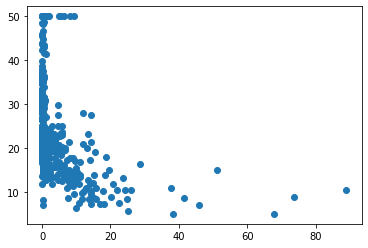

Domyślna metryka:
 0.17638094576814367
Współczynniki regresji:
 [-0.47981522]


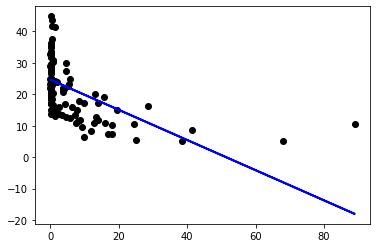

Walidacja krzyżowa:
 [-0.08001604  0.00846094 -0.70530959  0.12080509 -0.94163309]


In [17]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań. Użyj walidacji krzyżowej.

import matplotlib.pyplot as plt
%matplotlib inline

# Wczytywanie zbioru cech nieruchomości i ich cen
from sklearn.datasets import load_boston
boston_nieruchomosci = load_boston()
print(boston_nieruchomosci.DESCR)

# Wybieranie cechy wskaźnik przestępczości na mieszkańca według miasta
wskaznik_przestepczosci = boston_nieruchomosci['data'][:, np.newaxis, 0]
plt.scatter(wskaznik_przestepczosci, boston_nieruchomosci['target'])
plt.show()

# Stworzenie regresora liniowego
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(wskaznik_przestepczosci, boston_nieruchomosci['target'], test_size = 0.3)
linreg.fit(X_train, y_train)

# Przewidywanie ceny
y_pred = linreg.predict(X_test)

# Domyślna metryka
print('Domyślna metryka:\n', linreg.score(X_test, y_test))

# Współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji (przewidywanie cen mieszkań według wskaźnika przestępczości)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

# Walidacja krzyżowa
from sklearn.model_selection import cross_val_score
cv_score_r2 = cross_val_score(linreg, wskaznik_przestepczosci, boston_nieruchomosci.target, cv=5, scoring='r2')
print('Walidacja krzyżowa:\n', cv_score_r2)

# Zadanie bonus: zaimportuj dane nt cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. Sprawdź jakość modelu za pomocą walidacji krzyżowej.